In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
!ls /content/drive/MyDrive/cropdisease/PlantVillage


Pepper__bell___Bacterial_spot  Tomato_Late_blight
Pepper__bell___healthy	       Tomato_Leaf_Mold
Potato___Early_blight	       Tomato_Septoria_leaf_spot
Potato___healthy	       Tomato_Spider_mites_Two_spotted_spider_mite
Potato___Late_blight	       Tomato__Target_Spot
Tomato_Bacterial_spot	       Tomato__Tomato_mosaic_virus
Tomato_Early_blight	       Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_healthy


In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pickle


In [20]:
data_dir = '/content/drive/MyDrive/cropdisease/PlantVillage'
img_size = 64

categories = os.listdir(data_dir)
X = []
y = []

for category in categories:
    folder_path = os.path.join(data_dir, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(category)
        except:
            continue

X = np.array(X) / 255.0  # Normalize to 0-1
y = np.array(y)


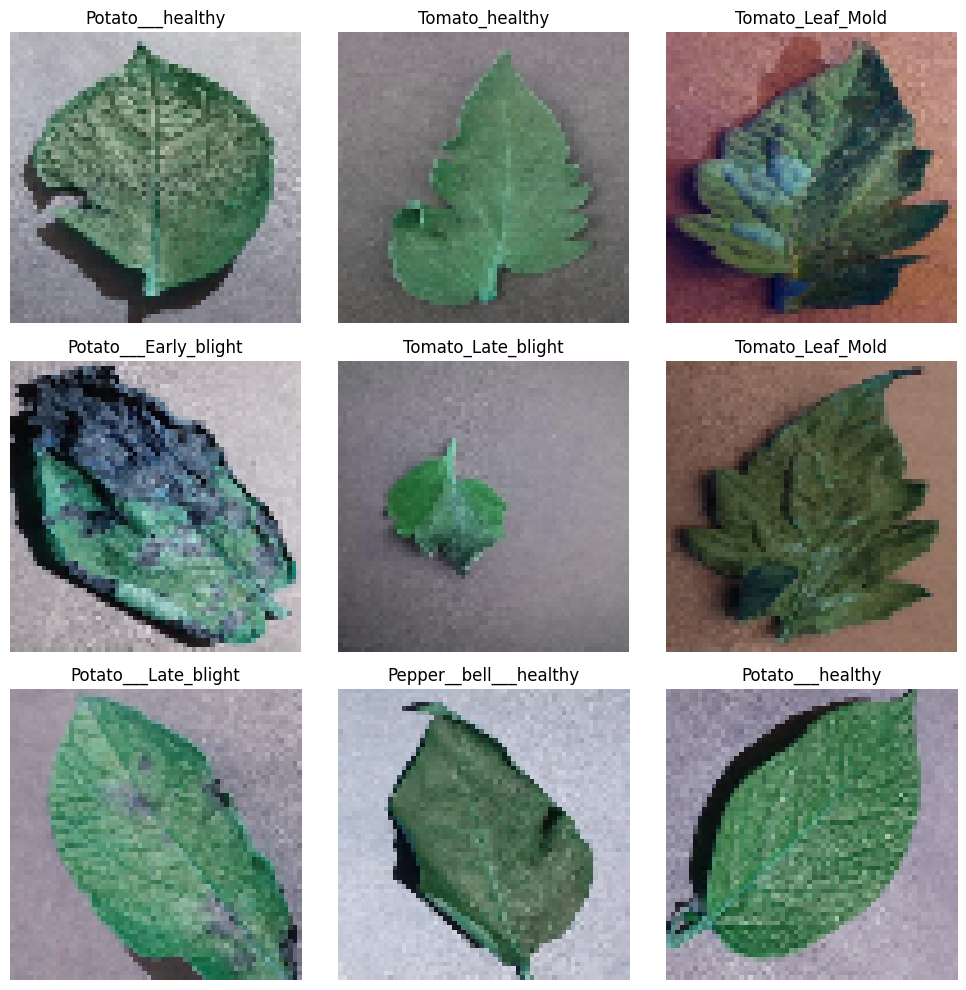

In [9]:
import random

plt.figure(figsize=(10, 10))
for i in range(9):
    idx = random.randint(0, len(X) - 1)
    img = X[idx].reshape(img_size, img_size, 3)
    label = y[idx]
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [22]:
print("Classes:", np.unique(y))
print("Encoded Labels:", np.unique(y_encoded))


Classes: ['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Tomato_Bacterial_spot' 'Tomato_Early_blight' 'Tomato_Late_blight'
 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites_Two_spotted_spider_mite' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato_healthy']
Encoded Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [23]:
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

print("Original Labels:", y[:5])
print("Encoded Labels:", y_encoded[:5])
print("One-Hot Encoded (first 5):")
print(y_categorical[:5])

# Save encoder
pickle.dump(le, open('label_encoder.sav', 'wb'))


Original Labels: ['Potato___healthy' 'Potato___healthy' 'Potato___healthy'
 'Potato___healthy' 'Potato___healthy']
Encoded Labels: [4 4 4 4 4]
One-Hot Encoded (first 5):
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)


In [25]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 229ms/step - accuracy: 0.0849 - loss: 2.7371 - val_accuracy: 0.1458 - val_loss: 2.6146
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 285ms/step - accuracy: 0.1630 - loss: 2.5482 - val_accuracy: 0.3085 - val_loss: 2.1944
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 215ms/step - accuracy: 0.2587 - loss: 2.2503 - val_accuracy: 0.4068 - val_loss: 2.0044
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 277ms/step - accuracy: 0.3202 - loss: 2.0477 - val_accuracy: 0.4949 - val_loss: 1.7535
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 220ms/step - accuracy: 0.3867 - loss: 1.8540 - val_accuracy: 0.5254 - val_loss: 1.5101
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 245ms/step - accuracy: 0.4485 - loss: 1.6332 - val_accuracy: 0.6305 - val_loss: 1.4680
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.4879 - loss: 1.5520 - val_accuracy: 0.5695 - val_loss: 1.3181
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 270ms/step - accuracy: 0.5607 - loss: 1.2925 - val_accu

In [27]:
model.save('/content/drive/MyDrive/cropdisease/plant_disease_cnn_model.h5')


In [28]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6242 - loss: 1.2657
Test Accuracy: 60.34%


In [29]:
import numpy as np

# Select a random image from test set
idx = np.random.randint(0, len(X_test))
sample_image = X_test[idx]
true_label = np.argmax(y_test[idx])  # original label

# Model expects batch input, so expand dims
pred = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(pred)

print(f"True Label: {true_label}")
print(f"Predicted Label: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
True Label: 14
Predicted Label: 14
